In [176]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_social = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/social'
_incomes = ['household', 'family', 'married', 'nonfamily', ]

In [177]:
def get_colors(data):
    colors = list()
    for value in data:
        if value == min(data):
            colors.append('indianred')
        elif value == max(data):
            colors.append('springgreen')
        else:
            colors.append('lightgrey')
    return colors

In [178]:
def get_incomes(df, city, year):
    '''
    function to get the incomes from the social data and plot it into a bar charts
    
    Inputs:
        - df: pandas dataframe
        - city: str, city name
        - year: str, year
    '''
    
    estimates = {
        'household': list(),
        'family': list(),
        'married': list(),
        'nonfamily': list()
    }
    margins = {
        'household': list(),
        'family': list(),
        'married': list(),
        'nonfamily': list()
    }
    
    for i in range(1, 11):
        
        for type in _incomes:
            
            # obtain the value from the percentage
            estimate = float(df[type + '_estimates'][i][:-1])
            margin = float(df[type + '_margins'][i][1:-1])
            
            # append to the list
            estimates[type].append(estimate)
            margins[type].append(margin)
    
    incomes = ['<10k', '10-15k', '15-25k', '25-35k', '35-50k', '50-75k', '75-100k', '100-150k', '150-200k', '>200k']
    # plot the data
    plt.figure(figsize=(10, 5))
    for label, value in estimates.items():
        plt.bar(np.arange(10) + list(estimates.keys()).index(label) * 0.2, value, width=0.2, label=label)
        plt.errorbar(np.arange(10) + list(estimates.keys()).index(label) * 0.2, value, yerr=margins[label], fmt='o', color='black', capsize=5)
    plt.xticks(np.arange(10), incomes)
    plt.legend()
    plt.title(f'{city} incomes in {year}')
    plt.ylabel('Percentage of people')
    plt.show()

def get_gender(df, city, year):
    '''
    function to get the gender from the social data and plot it into a bar charts
    
    Inputs:
        - df: pandas dataframe
        - city: str, city name
        - year: str, year
    '''
    
    estimates = {
        'total': list(),
        'male': list(),
        'female': list()
    }
    margins = {
        'total': list(),
        'male': list(),
        'female': list()
    }
    
    for i in range(2, 20):
        for gender in ['total', 'male', 'female']:
                
                # obtain the value from the percentage

                estimate = df[gender + '_estimates'][i]
                if type(estimate) == float:
                    estimate = str(estimate)
                estimate = int(estimate.replace(',', ''))
                
                margin = df[gender + '_margins'][i][1:]
                if type(margin) == float:
                    margin = str(margin)
                margin = int(margin.replace(',', ''))
                
                # append to the list
                estimates[gender].append(estimate)
                margins[gender].append(margin)
                
    # plot the data
    ages = ['<5', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
            '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']
    _= plt.subplots(figsize=(10, 5))
    for label, value in estimates.items():
        bar = plt.bar(np.arange(18) + list(estimates.keys()).index(label) * 0.2, value, width=0.2, label=label)
        plt.errorbar(np.arange(18) + list(estimates.keys()).index(label) * 0.2, value, yerr=margins[label], fmt='o', color='black', capsize=5)
    plt.xticks(np.arange(18), ages, rotation=45)
    plt.legend(loc='best')
    plt.title(f'{city} ages per gender in {year}')
    plt.ylabel('Number of people')
    
    plt.show()

def get_race(df, city, year):
    '''
    function to get the race from the social data and plot it into a bar charts
    
    Inputs:
        - df: pandas dataframe
        - city: str, city name
        - year: str, year
    '''
    
    labels = ['White', 'Black or \n African American', 'Indian and \n Alaska Native',
            'Asian', 'Native Hawaiian', 'Some Other Race', 'Two or More Races']
    
    estimates = list()
    margins = list()
    
    for i in range(1, 8):
        estimate = df['total_estimates'][i]
        if type(estimate) == float:
            estimate = str(estimate)
        estimate = int(estimate.replace(',', ''))
        
        try:
            margin = df['total_margins'][i][1:]
        except:
            margin = df['margin'][i]
        if type(margin) == float:
            margin = str(margin)
        margin = margin.replace(',', '')

        if len(margin) > 0:
            margin = margin[1:]
        margin = int(margin)
        
        estimates.append(estimate)
        margins.append(margin)
    
    # plot the data
    _, ax = plt.subplots(figsize=(10, 5), layout='constrained')
    
    _ = plt.barh(labels, estimates, color=get_colors(estimates))
    plt.errorbar(estimates, labels, xerr=margins, fmt='o', color='black', capsize=5)
    plt.xscale('log')
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(
        np.arange(len(estimates)),
        labels = estimates)
    ax2.set_ylabel('Number of people')
    plt.title(f'Races in {city} in {year}')
    plt.show()

Processing /Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/social/Boston/2022/02108/income.csv


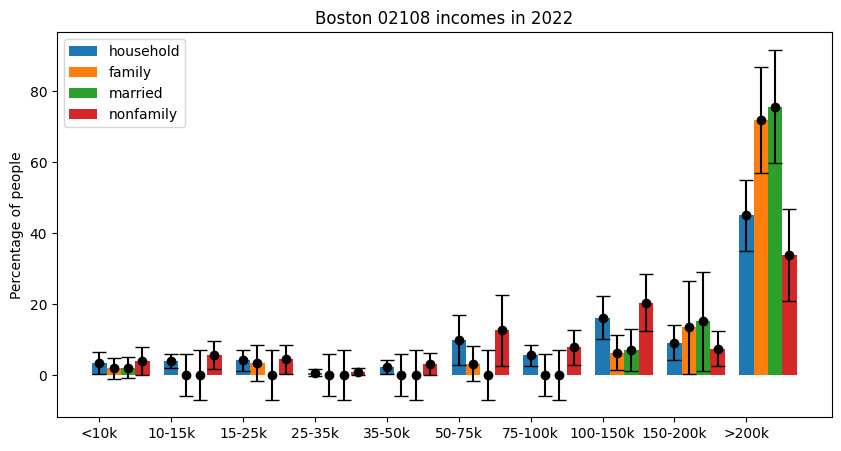

In [179]:
city = 'Boston'
year = '2022'
zip = '02108'

city_path = os.path.join(data_social, city)
year_path = os.path.join(city_path, year)
zip_path = os.path.join(year_path, zip, 'income.csv')

print(f'Processing {zip_path}')
df = pd.read_csv(zip_path)
city_zip = city + ' ' + zip
get_incomes(df, city_zip , year)

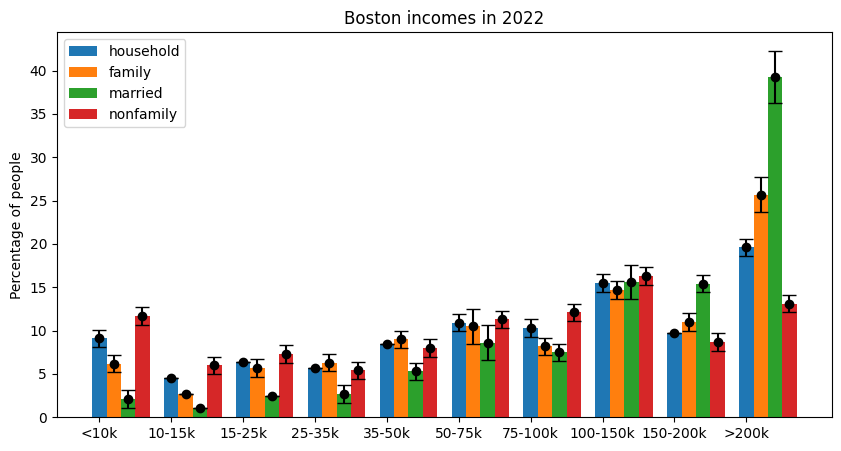

In [180]:
path = os.path.join(year_path, 'income.csv')
df = pd.read_csv(path)
get_incomes(df, city , year)

Processing /Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/social/Boston/2022/02108/gender.csv


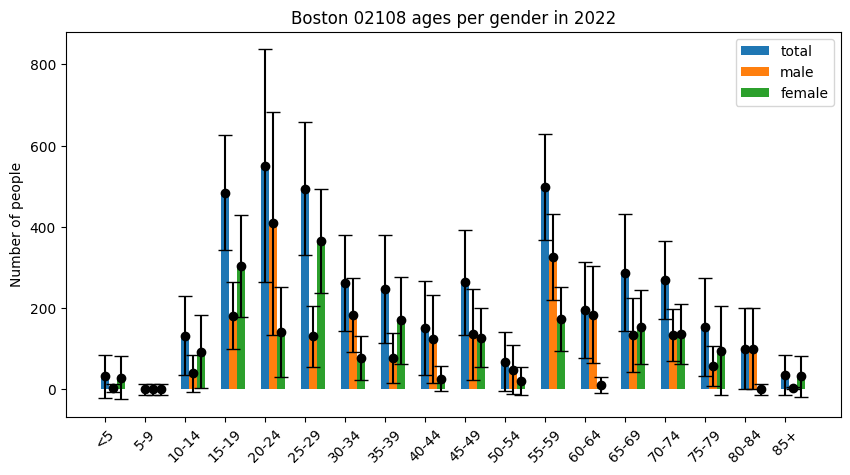

In [181]:
city_path = os.path.join(data_social, city)
year_path = os.path.join(city_path, year)
zip_path = os.path.join(year_path, zip, 'gender.csv')

print(f'Processing {zip_path}')
df = pd.read_csv(zip_path)
city_zip = city + ' ' + zip
get_gender(df, city_zip, year)

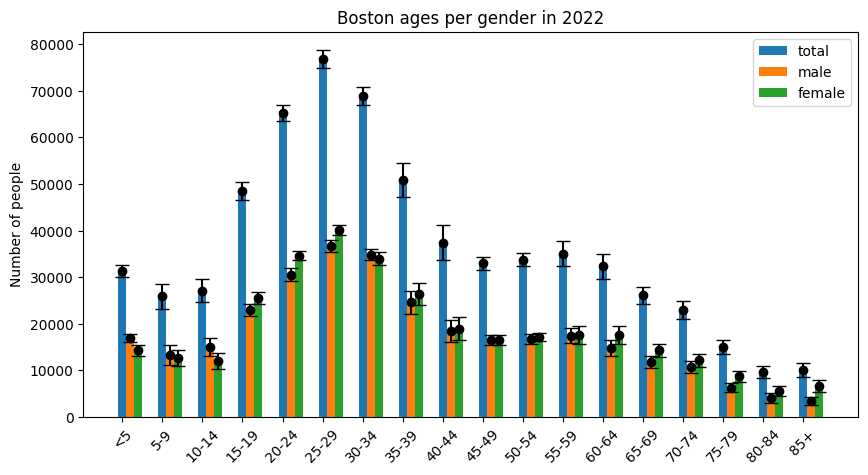

In [182]:
path = os.path.join(year_path, 'gender.csv')
df = pd.read_csv(path)
get_gender(df, city , year)

Processing /Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/social/Boston/2022/02108/race.csv


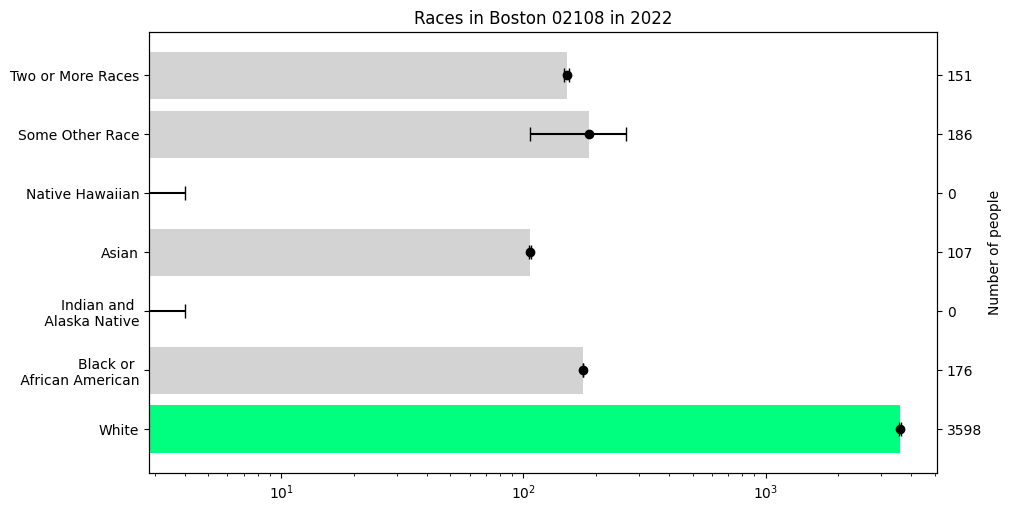

In [183]:
city_path = os.path.join(data_social, city)
year_path = os.path.join(city_path, year)
zip_path = os.path.join(year_path, zip, 'race.csv')

print(f'Processing {zip_path}')
df = pd.read_csv(zip_path)
city_zip = city + ' ' + zip
get_race(df, city_zip, year)

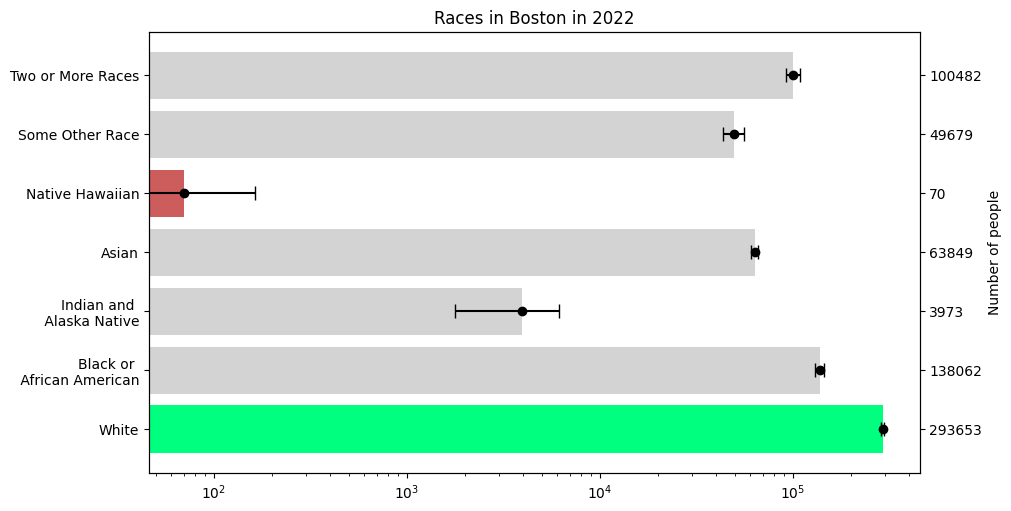

In [184]:
path = os.path.join(year_path, 'race.csv')
df = pd.read_csv(path)
get_race(df, city , year)